###Preprocesamiento de datos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv("dataset3.csv", header=0) #205*26
df.describe() #son 26 columnas pero no puede mostrarlas todas por el tipo de variable que tienen

symboling  normalized-losses  num-of-doors  wheel-base      length  \
count  205.000000         205.000000    205.000000  205.000000  205.000000   
mean     0.834146         123.029268      3.131707   98.756585  174.049268   
std      1.245307          35.240339      0.993715    6.021776   12.337289   
min     -2.000000          65.000000      2.000000   86.600000  141.100000   
25%      0.000000          94.000000      2.000000   94.500000  166.300000   
50%      1.000000         118.000000      4.000000   97.000000  173.200000   
75%      2.000000         150.000000      4.000000  102.400000  183.100000   
max      3.000000         256.000000      4.000000  120.900000  208.100000   

            width      height  curb-weight  num-of-cylinders  engine-size  \
count  205.000000  205.000000   205.000000        205.000000   205.000000   
mean    65.907805   53.724878  2555.565854          4.380488   126.907317   
std      2.145204    2.443522   520.680204          1.080854    41.642693   
min     60.300000   47.800000  1488.000000          2.000000    61.000000   
25%     64.100000   52.000000  2145.000000          4.000000    97.000000   
50%     65.500000   54.100000  2414.000000          4.000000   120.000000   
75%     66.900000   55.500000  2935.000000          4.000000   141.000000   
max     72.300000   59.800000  4066.000000         12.000000   326.000000   

             bore      stroke  compression-ratio  horsepower     peak-rpm  \
count  205.000000  205.000000         205.000000  205.000000   205.000000   
mean     3.327415    3.255707          10.142537  103.951220  5118.292683   
std      0.271352    0.313604           3.972040   39.639028   482.304021   
min      2.540000    2.070000           7.000000   48.000000  4150.000000   
25%      3.150000    3.110000           8.600000   70.000000  4800.000000   
50%      3.310000    3.290000           9.000000   95.000000  5200.000000   
75%      3.580000    3.410000           9.400000  116.000000  5500.000000   
max      3.940000    4.170000          23.000000  288.000000  6600.000000   

         city-mpg  highway-mpg         price  
count  205.000000   205.000000    205.000000  
mean    25.219512    30.751220  13243.907317  
std      6.542142     6.886443   7904.291143  
min     13.000000    16.000000   5118.000000  
25%     19.000000    25.000000   7788.000000  
50%     24.000000    30.000000  10345.000000  
75%     30.000000    34.000000  16503.000000  
max     49.000000    54.000000  45400.000000

####Análisis de información faltante

In [6]:
#columnas con información faltante
#normalized-losses y n-doors (int)
#bore y stroke (float) están ligadas
#hosepower y peak-rpm (int) también estan ligadas
#realizaré un análisis sencillo y les colocaré la media de los valores correspondientes a su marca, o características en común
#este procedimiento lo haré manualmente

####Análisis de variables categóricas

Las variables de número de puertas y número de cilindros, se cambiaron de tipo str a int para facilitar ese tratamiento

In [7]:
df = pd.get_dummies(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int64  
 2   num-of-doors            205 non-null    int64  
 3   wheel-base              205 non-null    float64
 4   length                  205 non-null    float64
 5   width                   205 non-null    float64
 6   height                  205 non-null    float64
 7   curb-weight             205 non-null    int64  
 8   num-of-cylinders        205 non-null    int64  
 9   engine-size             205 non-null    int64  
 10  bore                    205 non-null    float64
 11  stroke                  205 non-null    float64
 12  compression-ratio       205 non-null    float64
 13  horsepower              205 non-null    int64  
 14  peak-rpm                205 non-null    in

<Axes: >

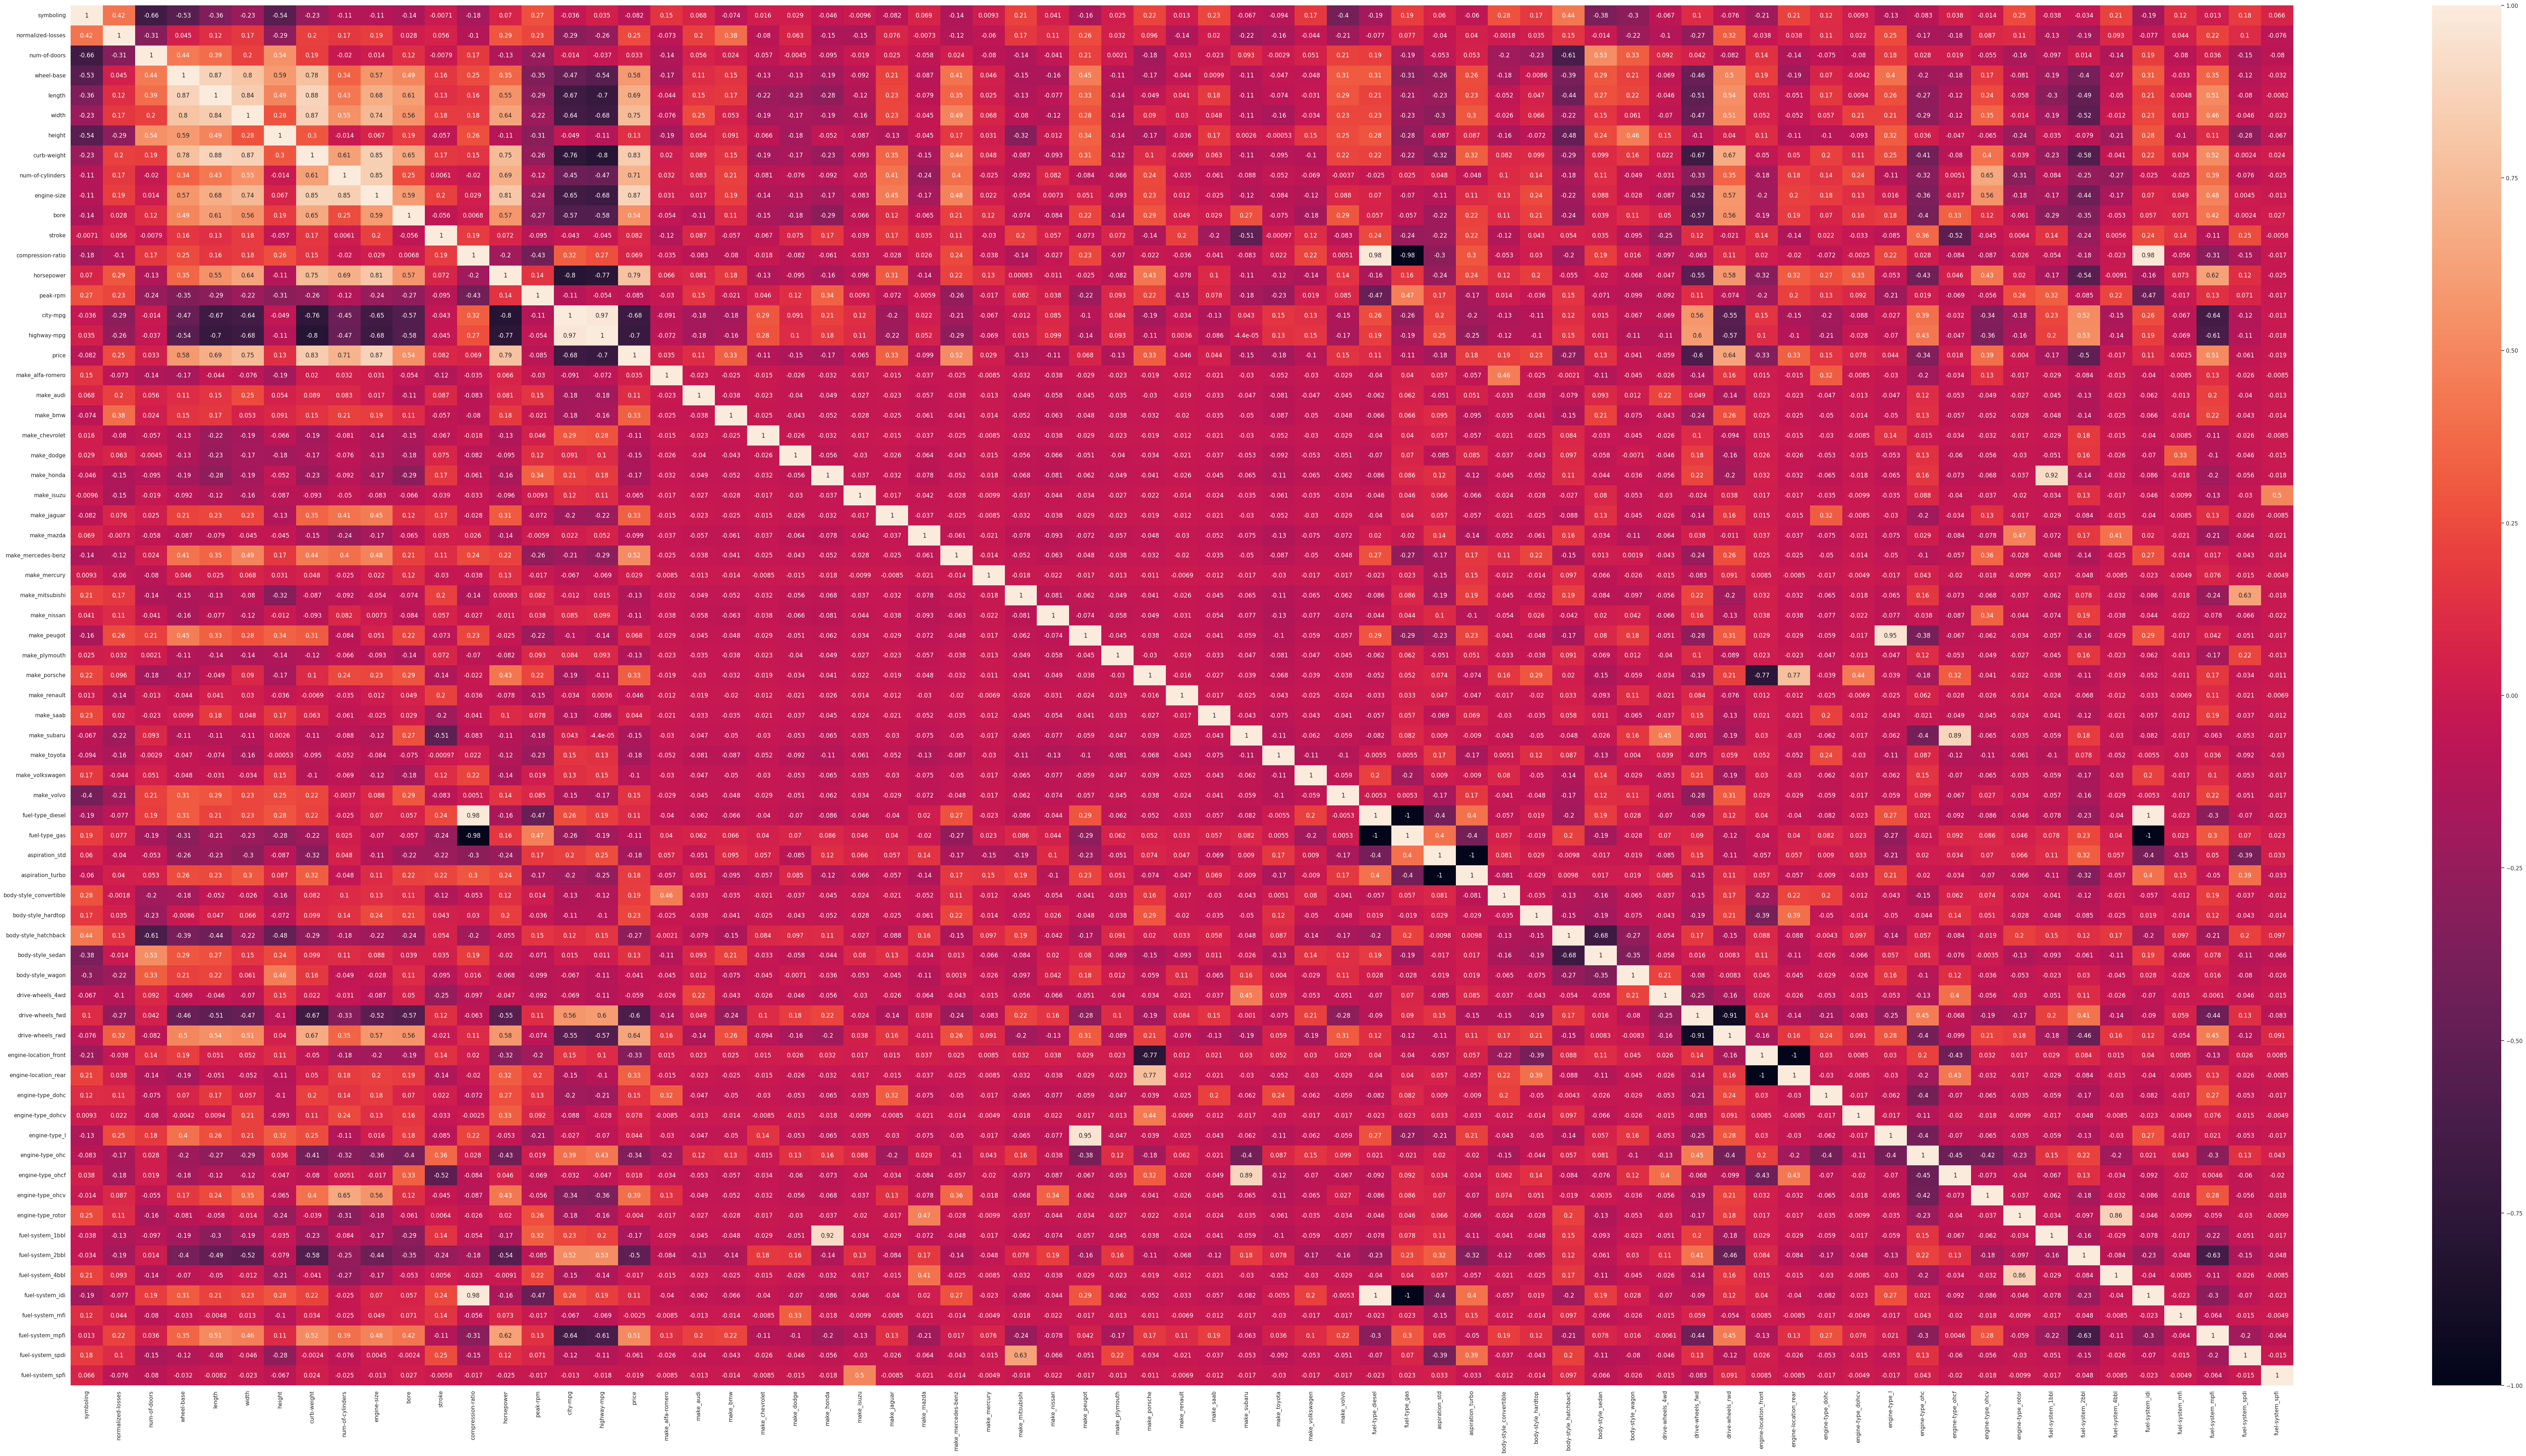

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', context='notebook')
#graficamos la correlación de las variables para eliminar las que tengan mucha correlación entre ellas y no con la variable objetivo
cols =["symboling","normalized-losses","num-of-doors","wheel-base","length","width","height","curb-weight","num-of-cylinders","engine-size",
       "bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price","make_alfa-romero","make_audi","make_bmw",
       "make_chevrolet","make_dodge","make_honda","make_isuzu","make_jaguar","make_mazda","make_mercedes-benz","make_mercury","make_mitsubishi",
       "make_nissan","make_peugot","make_plymouth","make_porsche","make_renault","make_saab","make_subaru","make_toyota","make_volkswagen",
       "make_volvo","fuel-type_diesel","fuel-type_gas","aspiration_std","aspiration_turbo","body-style_convertible","body-style_hardtop",
       "body-style_hatchback","body-style_sedan","body-style_wagon","drive-wheels_4wd","drive-wheels_fwd","drive-wheels_rwd","engine-location_front",
       "engine-location_rear","engine-type_dohc","engine-type_dohcv","engine-type_l","engine-type_ohc","engine-type_ohcf","engine-type_ohcv",
       "engine-type_rotor","fuel-system_1bbl","fuel-system_2bbl","fuel-system_4bbl","fuel-system_idi","fuel-system_mfi","fuel-system_mpfi",
       "fuel-system_spdi","fuel-system_spfi"]

plt.figure(figsize=(100,50))
sns.heatmap(
    data=df[cols].corr(),
    cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

Con esta matriz de correlación entre variables podemos observar las que están más relacionadas a nuestra variable objetivo que es el precio, así como también podemos observar las que tienen relaciones fuertes pero no ayudan con la variable objetivo.

####Eliminando variables de alta correlación

<Axes: >

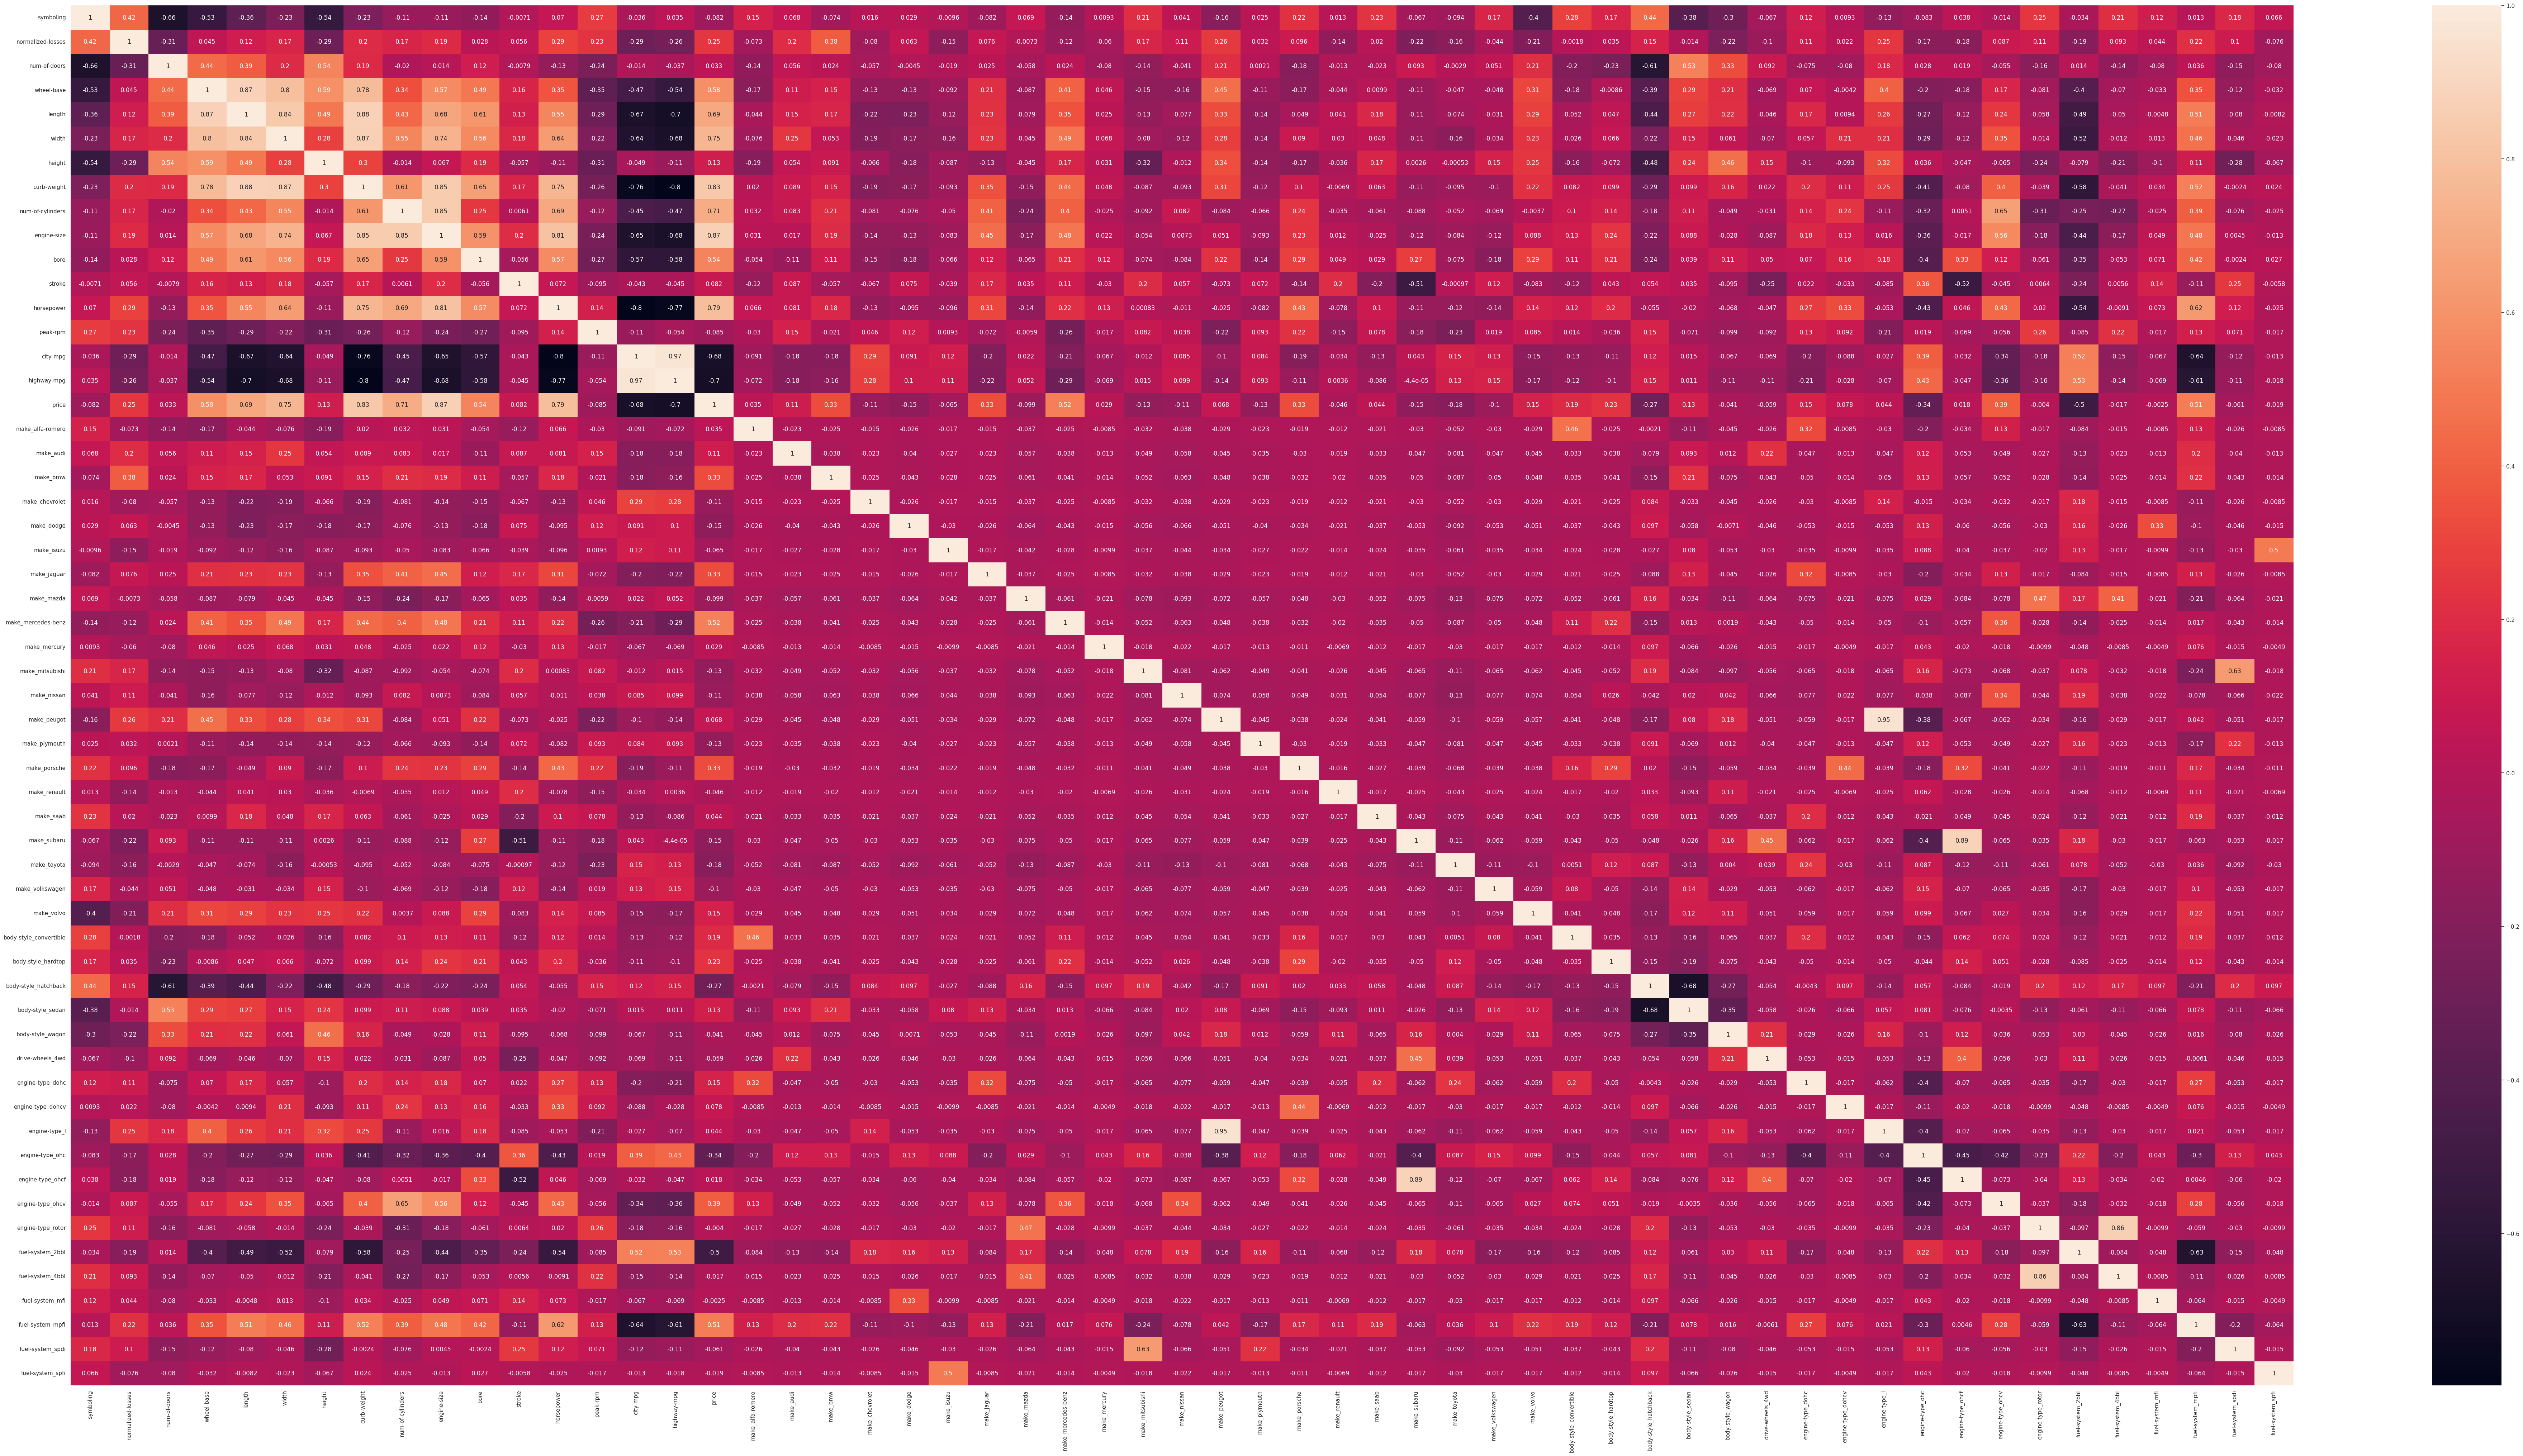

In [9]:
#Eliminando columnas innecesarias

del df['compression-ratio']
del df['fuel-system_idi']
del df['fuel-type_gas']
del df['fuel-type_diesel']
del df['engine-location_rear']
del df['engine-location_front']
del df['aspiration_std']
del df['aspiration_turbo']
del df['drive-wheels_fwd']
del df['drive-wheels_rwd']
del df['fuel-system_1bbl']
del df['make_honda']

#volvemos a visualizar
cols =["symboling","normalized-losses","num-of-doors","wheel-base","length","width","height","curb-weight","num-of-cylinders","engine-size",
       "bore","stroke","horsepower","peak-rpm","city-mpg","highway-mpg","price","make_alfa-romero","make_audi","make_bmw","make_chevrolet",
       "make_dodge","make_isuzu","make_jaguar","make_mazda","make_mercedes-benz","make_mercury","make_mitsubishi","make_nissan",
       "make_peugot","make_plymouth","make_porsche","make_renault","make_saab","make_subaru","make_toyota","make_volkswagen","make_volvo",
       "body-style_convertible","body-style_hardtop","body-style_hatchback","body-style_sedan","body-style_wagon","drive-wheels_4wd",
       "engine-type_dohc","engine-type_dohcv","engine-type_l","engine-type_ohc","engine-type_ohcf","engine-type_ohcv","engine-type_rotor",
       "fuel-system_2bbl","fuel-system_4bbl","fuel-system_mfi","fuel-system_mpfi","fuel-system_spdi","fuel-system_spfi"]

plt.figure(figsize=(100,50))
sns.heatmap(
    data=df[cols].corr(),
    cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

###Seleccionando las mejores features para nuestro modelo

Ahora que ya no existe una correlación muy alta entre variables independientes al target, podemos ver que la mayoria de variables categóricas que transformamos no son de mucha utilidad, todo se centra en las primeras características, visualizaremos mejor esta parte para elegir las que podrían ser de más ayuda a la hora de intentar predecir el precio.

<Axes: >

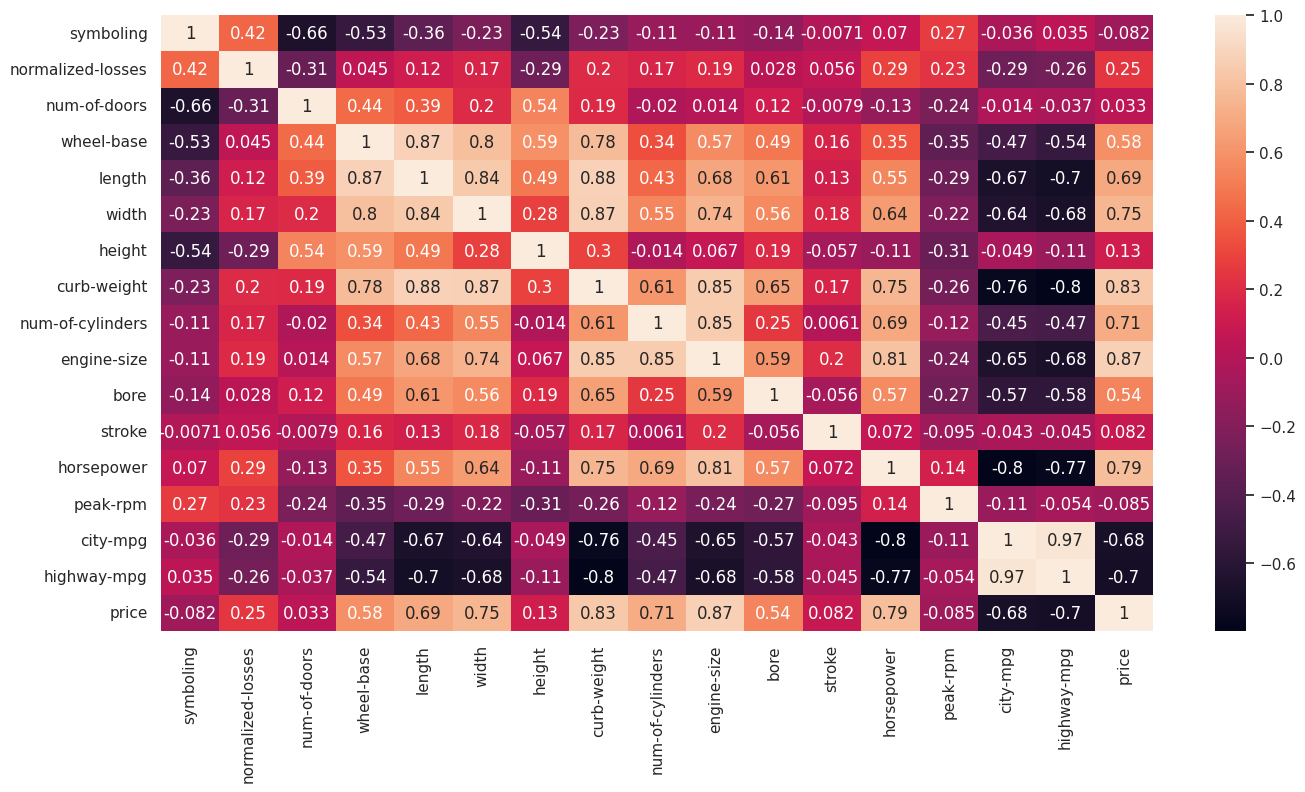

In [10]:
#volvemos a visualizar
cols =["symboling","normalized-losses","num-of-doors","wheel-base","length","width","height","curb-weight","num-of-cylinders","engine-size",
       "bore","stroke","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

plt.figure(figsize=(16,8))
sns.heatmap(
    data=df[cols].corr(),
    cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

In [11]:
#correlación de features con el target
correlacion = [0.082, 0.25, 0.033, 0.58, 0.69, 0.75, 0.13, 0.83, 0.71, 0.87, 0.54, 0.082,0.79,0.085,0.68,0.7,1]
correlacion.sort()

print(correlacion)

[0.033, 0.082, 0.082, 0.085, 0.13, 0.25, 0.54, 0.58, 0.68, 0.69, 0.7, 0.71, 0.75, 0.79, 0.83, 0.87, 1]


* Nos quedaremos con las 3 más altas correlaciones con el target:
      engine_size: 0.87       (Tamaño del motor)
      curb_weight: 0.83       (Peso total)
      horsepower: 0.79        (Caballos de fuerza)

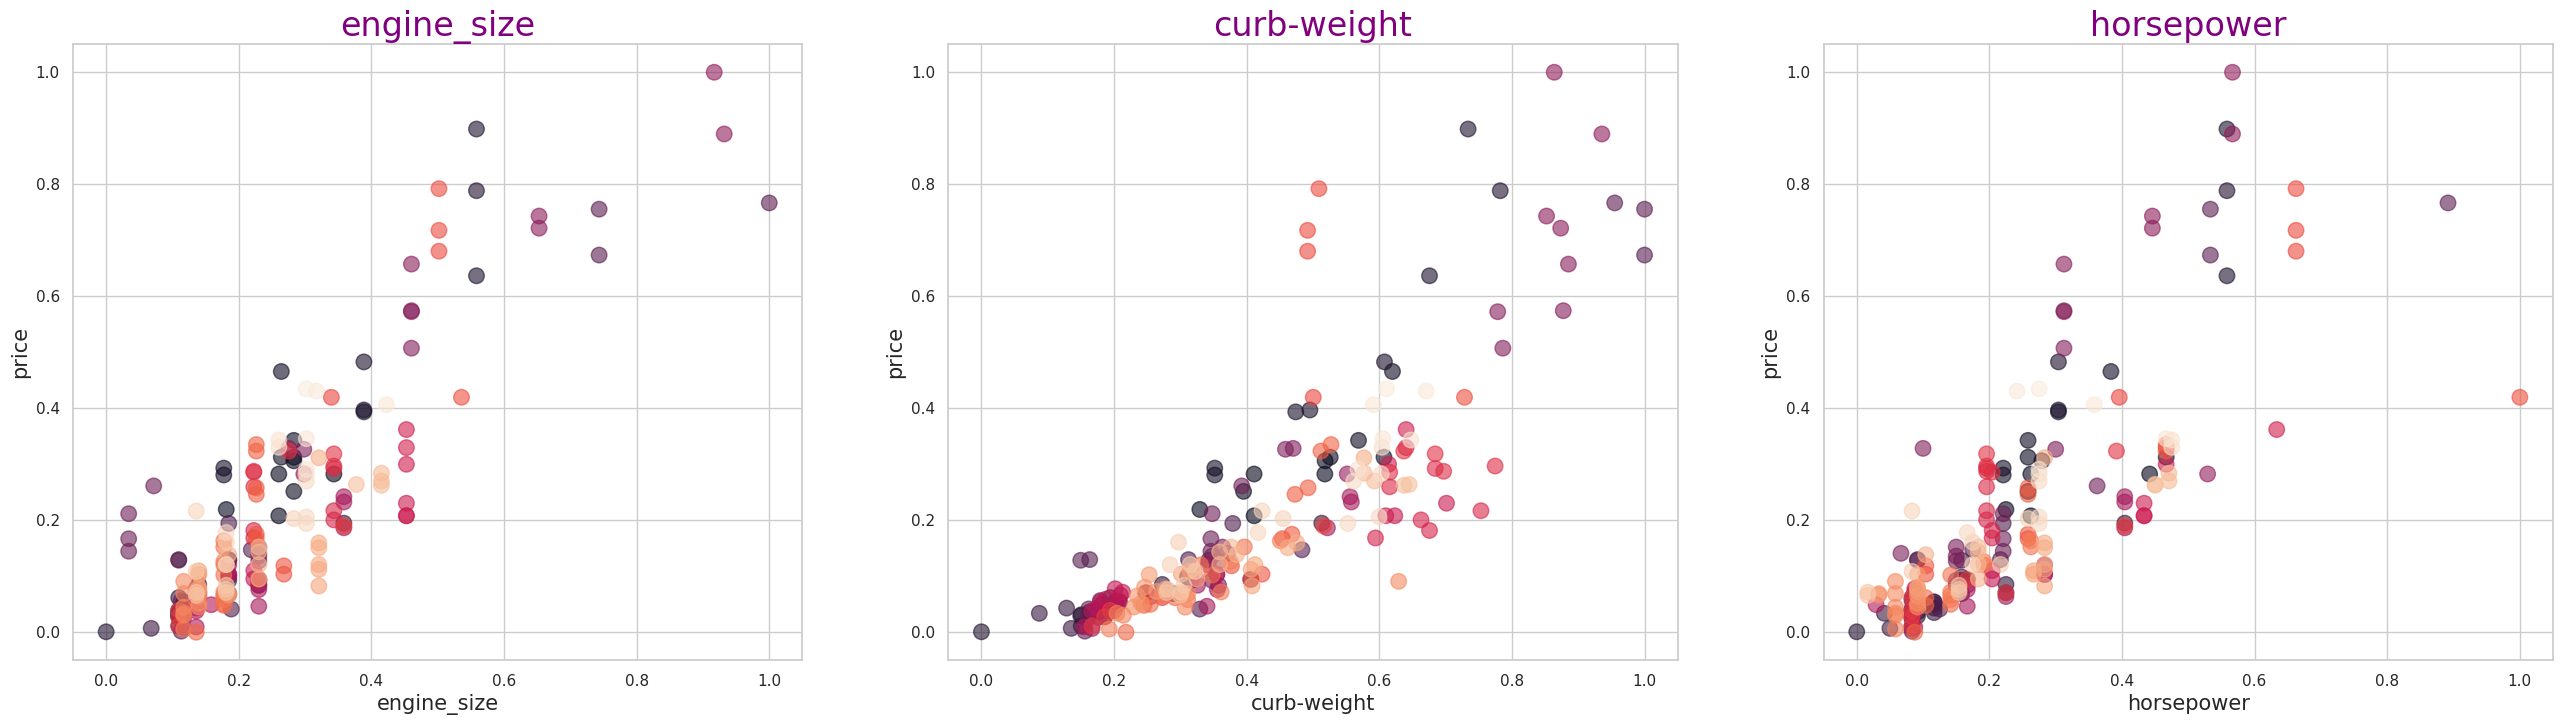

In [12]:
from sklearn import preprocessing #para re-escalar los datos

fig = plt.figure(figsize=(32, 8))

#(Engine_size)
escala_x = preprocessing.MinMaxScaler()
escala_y = preprocessing.MinMaxScaler()
x = escala_x.fit_transform(df['engine-size'].values.reshape(-1,1))
y = escala_y.fit_transform(df['price'].values.reshape(-1,1))

ax = fig.add_subplot(1,3,1)
ax.scatter(x, y, marker=".",
           s=500, c=range(x.size), alpha=0.6)

ax.set_title("engine_size", size=24, color="purple")
ax.set_ylabel("price", size=15)
ax.set_xlabel("engine_size", size=15)
ax.ticklabel_format(style="plain")

#(Curb_weight)
escala_x = preprocessing.MinMaxScaler()
escala_y = preprocessing.MinMaxScaler()
x = escala_x.fit_transform(df['curb-weight'].values.reshape(-1,1))
y = escala_y.fit_transform(df['price'].values.reshape(-1,1))

ax = fig.add_subplot(1,3,2)
ax.scatter(x, y, marker=".",
           s=500, c=range(x.size), alpha=0.6)

ax.set_title("curb-weight", size=24, color="purple")
ax.set_ylabel("price", size=15)
ax.set_xlabel("curb-weight", size=15)
ax.ticklabel_format(style="plain")

#(Horsepower)
escala_x = preprocessing.MinMaxScaler()
escala_y = preprocessing.MinMaxScaler()
x = escala_x.fit_transform(df['horsepower'].values.reshape(-1,1))
y = escala_y.fit_transform(df['price'].values.reshape(-1,1))

ax = fig.add_subplot(1,3,3)
ax.scatter(x, y, marker=".",
           s=500, c=range(x.size), alpha=0.6)

ax.set_title("horsepower", size=24, color="purple")
ax.set_ylabel("price", size=15)
ax.set_xlabel("horsepower", size=15)
ax.ticklabel_format(style="plain")

plt.show()

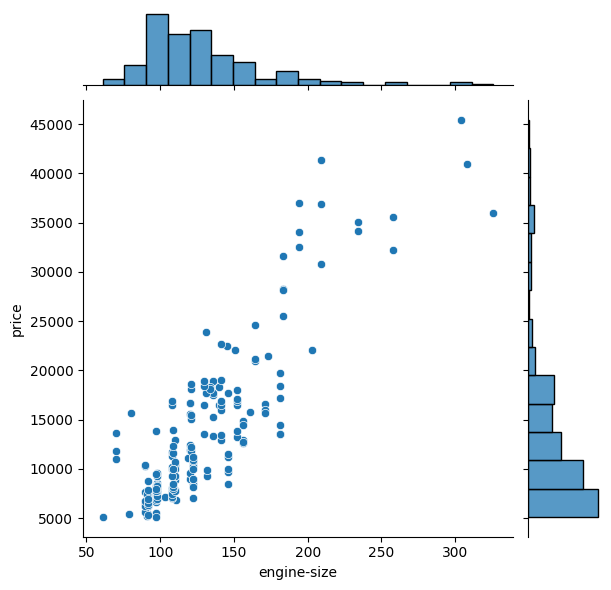

In [5]:
sns.jointplot(x="engine-size", y="price", data=df)

Prueba de shapiro:  0.8294388651847839


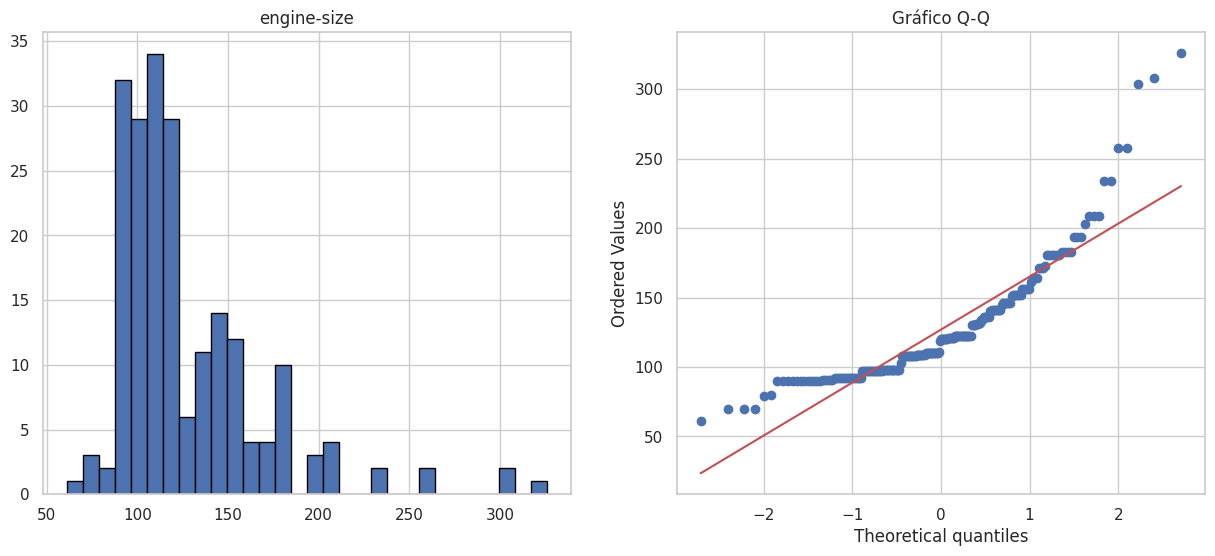

In [13]:
def diagmostic_grafic(df, variable):
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  plt.title(variable)
  df[variable].hist(bins=30, edgecolor='black')
  plt.subplot(1,2,2)
  stats.probplot(df[variable], dist='norm', plot=plt)
  plt.title('Gráfico Q-Q')
  plt.show()

res = stats.shapiro(df['engine-size'])
print("Prueba de shapiro: ",res.statistic)
diagmostic_grafic(df, 'engine-size')

Prueba de shapiro:  0.8026764392852783


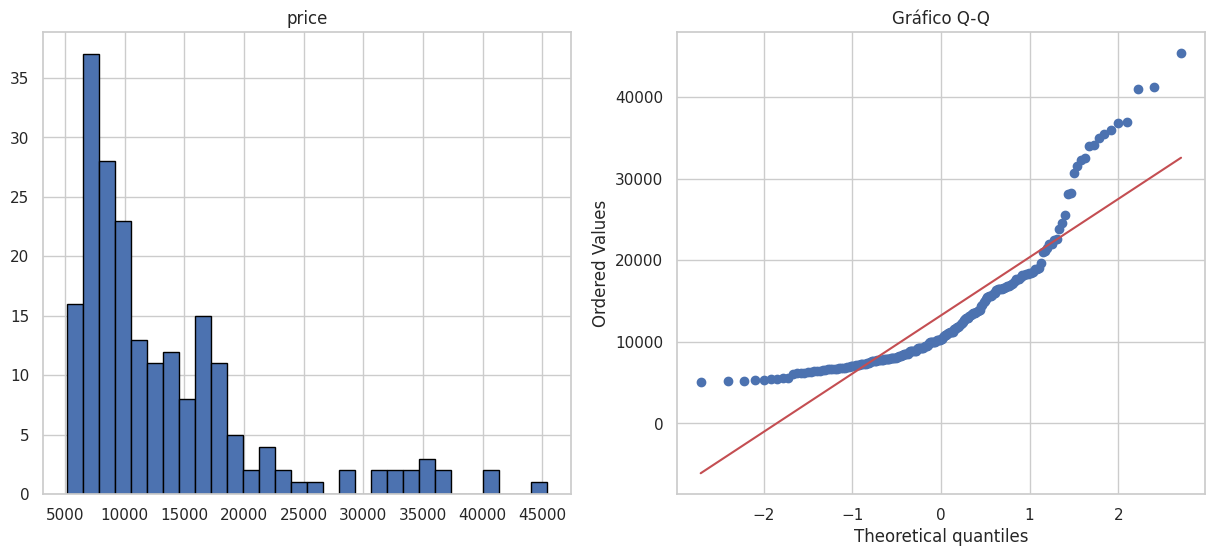

In [14]:
res = stats.shapiro(df['price'])
print("Prueba de shapiro: ",res.statistic)
diagmostic_grafic(df, 'price')

###Modelo de regresión lineal (Sklearn)
Realizaremos un modelo para cada una de las 3 variables que elegimos anteriormente

Los resultados para regresión lineal: 
Intercepto: -7574.9358571171, coeficiente: [163.28888553]
El R^2 en training es:0.7558857686937257 y en test es:0.7658976180008027
El MSE en training es:15233640.967971921 y en test es:14424950.590288043
El MAE en training es:2776.1139346675964 y en test es:2907.4985630473225


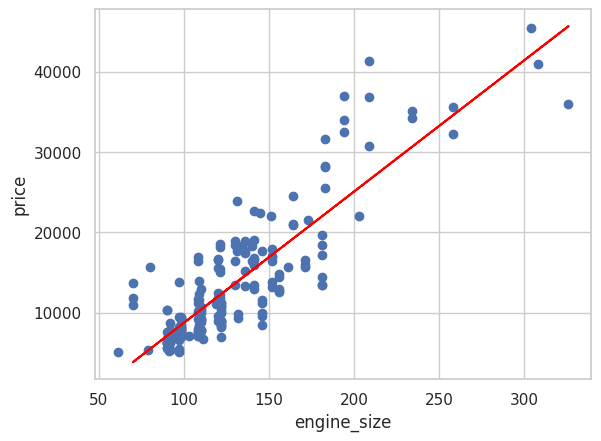

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

#Engine_size linear model
x_train, x_test, y_train, y_test = train_test_split(df[['engine-size']],df['price'], test_size=0.3, random_state=0)

lm = LinearRegression()
lm.fit(x_train,y_train)

#con el modelo creado, podemos predecir los valores en y
y_train_a = lm.predict(x_train)
y_test_a = lm.predict(x_test)

#Visualizando el modelo creado
plt.scatter(df['engine-size'], df['price'])

# Graficamos la linea de regresion ajustada
plt.plot(x_train, lm.predict(x_train), color='red')
plt.xlabel("engine_size")
plt.ylabel("price")

# Calcular las métricas de precisión
rtrain = r2_score(y_train,y_train_a)
rtest  = r2_score(y_test,y_test_a)

mse_train = mean_squared_error(y_train, y_train_a)
mse_test = mean_squared_error(y_test, y_test_a)

mae_train = mean_absolute_error(y_train, y_train_a)
mae_test = mean_absolute_error(y_test, y_test_a)

# Mostrar los resultados
print("Los resultados para regresión lineal: ")
print(f"Intercepto: {lm.intercept_}, coeficiente: {lm.coef_}")
print(f"El R^2 en training es:{rtrain} y en test es:{rtest}")
print(f"El MSE en training es:{mse_train} y en test es:{mse_test}")
print(f"El MAE en training es:{mae_train} y en test es:{mae_test}")

In [16]:
#intervalo de confianza
from sklearn.metrics import mean_squared_error
from math import sqrt

error = sqrt(mean_squared_error(y_test, y_test_a))
error

3798.019298303794

Nuestro intervalo de confianza:

    (y ± 3798.0192)
  Donde y es el valor que predice el modelo

Intercepto: -18675.482928302215, coeficiente: [12.40180932]
Los resultados: 
El R^2 en training es:0.6845155148200108 y en test es:0.7114046098643798
El MSE en training es:19687411.719014715 y en test es:17782707.75265113
El MAE en training es:2848.0427303925862 y en test es:2598.0883663316004


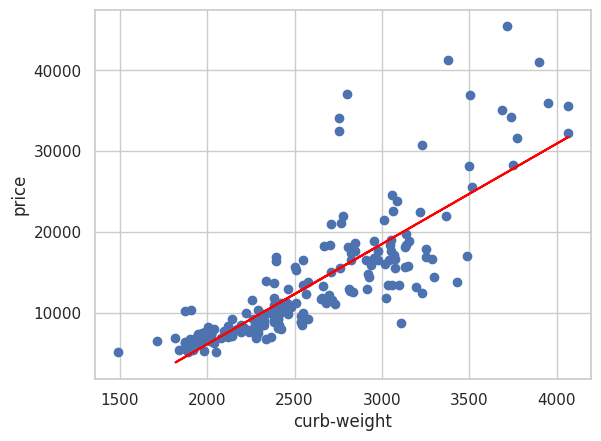

In [17]:
#curb-weight linear model
x_train, x_test, y_train, y_test = train_test_split(df[['curb-weight']],df['price'], test_size=0.3, random_state=0)

lm2 = LinearRegression()
lm2.fit(x_train,y_train)

#con el modelo creado, podemos predecir los valores en y
y_train_a = lm2.predict(x_train)
y_test_a = lm2.predict(x_test)

#Visualizando el modelo creado
plt.scatter(df['curb-weight'], df['price'])

# Graficamos la linea de regresion ajustada
plt.plot(x_train, lm2.predict(x_train), color='red')
plt.xlabel("curb-weight")
plt.ylabel("price")

print(f"Intercepto: {lm2.intercept_}, coeficiente: {lm2.coef_}")

# Calcular las métricas de precisión
rtrain = r2_score(y_train,y_train_a)
rtest  = r2_score(y_test,y_test_a)

mse_train = mean_squared_error(y_train, y_train_a)
mse_test = mean_squared_error(y_test, y_test_a)

mae_train = mean_absolute_error(y_train, y_train_a)
mae_test = mean_absolute_error(y_test, y_test_a)

# Mostrar los resultados
print("Los resultados: ")
print(f"El R^2 en training es:{rtrain} y en test es:{rtest}")
print(f"El MSE en training es:{mse_train} y en test es:{mse_test}")
print(f"El MAE en training es:{mae_train} y en test es:{mae_test}")

Intercepto: -4435.513245143702, coeficiente: [170.49774062]
Los resultados: 
El R^2 en training es:0.6711586954071432 y en test es:0.48927045011409276
El MSE en training es:20520927.201995216 y en test es:31470198.88985805
El MAE en training es:3265.343565334541 y en test es:3723.1553357858297


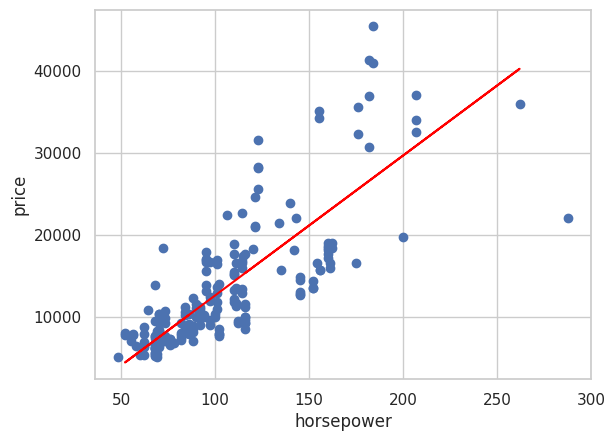

In [18]:
#horsepower linear model
x_train, x_test, y_train, y_test = train_test_split(df[['horsepower']],df['price'], test_size=0.3, random_state=0)

lm3 = LinearRegression()
lm3.fit(x_train,y_train)

#con el modelo creado, podemos predecir los valores en y
y_train_a = lm3.predict(x_train)
y_test_a = lm3.predict(x_test)

#Visualizando el modelo creado
plt.scatter(df['horsepower'], df['price'])

# Graficamos la linea de regresion ajustada
plt.plot(x_train, lm3.predict(x_train), color='red')
plt.xlabel("horsepower")
plt.ylabel("price")

print(f"Intercepto: {lm3.intercept_}, coeficiente: {lm3.coef_}")

# Calcular las métricas de precisión
rtrain = r2_score(y_train,y_train_a)
rtest  = r2_score(y_test,y_test_a)

mse_train = mean_squared_error(y_train, y_train_a)
mse_test = mean_squared_error(y_test, y_test_a)

mae_train = mean_absolute_error(y_train, y_train_a)
mae_test = mean_absolute_error(y_test, y_test_a)

# Mostrar los resultados
print("Los resultados: ")
print(f"El R^2 en training es:{rtrain} y en test es:{rtest}")
print(f"El MSE en training es:{mse_train} y en test es:{mse_test}")
print(f"El MAE en training es:{mae_train} y en test es:{mae_test}")

###Regresión lineal con K-NN

Text(0, 0.5, 'Tasa de error')

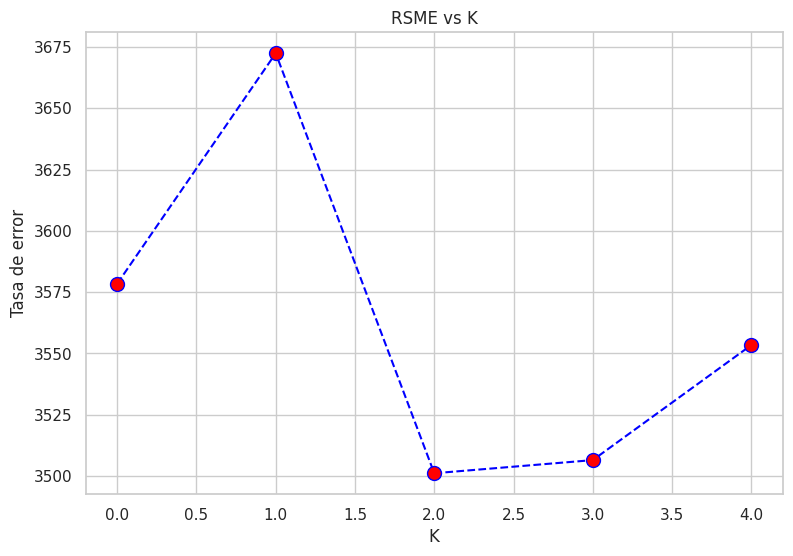

In [19]:
from sklearn import preprocessing #para re-escalar los datos

#Buscando la mejor K
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(df[['engine-size']],df['price'], test_size=0.3, random_state=0)

# Escalamos los datos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_knn = sc.fit_transform(x_train_knn) #escalamos el set de entrenamiento
x_test_knn = sc.transform(x_test_knn) #escalamos el set de prueba

from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_val = [] #almacenaremos los diferentes valores de k
for K in range(5):
  K += 1
  model = neighbors.KNeighborsRegressor(n_neighbors=K)
  model.fit(x_train_knn, y_train_knn)
  pred = model.predict(x_test_knn)
  error = sqrt(mean_squared_error(y_test_knn, pred))
  rmse_val.append(error)

#graficaremos el arreglo para encontrar el error minimo y la k optima
plt.figure(figsize=(9,6))
plt.plot(rmse_val, color = "blue", linestyle="dashed", marker="o",
         markerfacecolor = "red", markersize=10)
plt.title("RSME vs K")
plt.xlabel("K")
plt.ylabel("Tasa de error")

Ahora que tenemos la k optima = 3

Los resultados para KNN: 
El R^2 en training es:0.9002511357465172 y en test es:0.8123191593400859
El MSE en training es:6224702.168609169 y en test es:11564542.103942651
El MAE en training es:1696.6923076923076 y en test es:2403.5053763440856


Text(0, 0.5, 'price')

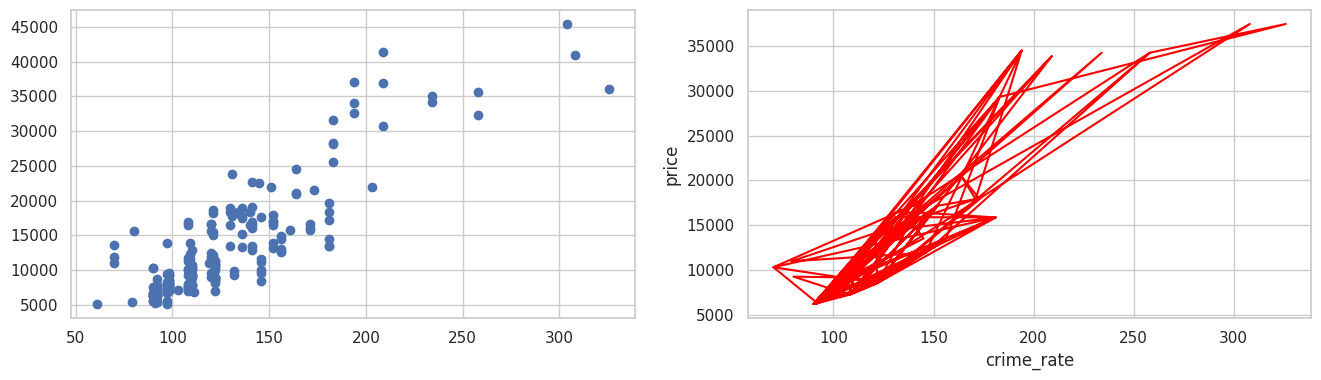

In [20]:
#Para crear el modelo K-NN
from sklearn.neighbors import KNeighborsRegressor
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(df[['engine-size']],df['price'], test_size=0.3, random_state=0)

knn_ev = KNeighborsRegressor(n_neighbors=3)
regressor = knn_ev.fit(x_train_knn, y_train_knn)

#La predicción del modelo construido
y_predict_train_knn = regressor.predict(x_train_knn)
y_predict_test_knn = regressor.predict(x_test_knn)

# Calcular las métricas de precisión
rtrain_knn = r2_score(y_train_knn,y_predict_train_knn)
rtest_knn  = r2_score(y_test_knn,y_predict_test_knn)

mse_train_knn = mean_squared_error(y_train_knn, y_predict_train_knn)
mse_test_knn = mean_squared_error(y_test_knn, y_predict_test_knn)

mae_train_knn = mean_absolute_error(y_train_knn, y_predict_train_knn)
mae_test_knn = mean_absolute_error(y_test_knn, y_predict_test_knn)

# Mostrar los resultados
print("Los resultados para KNN: ")
print(f"El R^2 en training es:{rtrain_knn} y en test es:{rtest_knn}")
print(f"El MSE en training es:{mse_train_knn} y en test es:{mse_test_knn}")
print(f"El MAE en training es:{mae_train_knn} y en test es:{mae_test_knn}")

# Graficamos la linea de regresion
fig = plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.scatter(df['engine-size'], df['price'])
plt.subplot(1,2,2)
plt.plot(x_train_knn, y_predict_train_knn, color='red')
plt.xlabel("crime_rate")
plt.ylabel("price")

###Conclusiones

La mejor característica encontrada para predecir el precio de un auto, es su tamaño de motor, la regresión lineal obtuvo muy buenos resultados, explica el 75% de variabilidad en entrenamiento y 76% en pruebas, lo que quiere decir que nuestro modelo aprende y no memoriza, no se realizo ningún tipo de transformación debido a que en este caso no es de mucha ayuda, no se mejora la correlación y por ende, tampoco se mejora el modelo.

Por otro lado, el modelo generado por K-NN explica el 90% y 80% en train y test respectivamente, esto es debido a que K-NN cómo tal no realiza una regresión lineal, si no que realiza una aproximación con el calculo de la media de los K vecinos que nosotros indiquemos, por ello en la gráfica de arriba las líneas rojas siguen más apropiadamente la figura que tienen los datos.